# Yoga-82: A New Dataset* for Fine-grained Classification of Human Poses
*https://sites.google.com/view/yoga-82/home?pli=1

for large-scale yoga pose recognition with 82 classes

In [1]:
#!pip install pipreqsnb

In [2]:
#!pipreqsnb

# Imports

In [3]:
import os
import urllib.request
from pathlib import Path
import PIL
import PIL.Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import cv2
from IPython.display import Image
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"]= "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

import numpy as np
from numpy import argmax
import random
import matplotlib.pyplot as plt
import pandas as pd

import os
os.environ["CUDA_DEVICE_ORDER"]= "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "0"

import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adam
import torch

import keras
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint,CSVLogger
import keras.backend as K
from keras import layers
from keras import backend
from keras import models
from keras import utils as keras_utils
from keras_applications import imagenet_utils
from keras_applications.imagenet_utils import decode_predictions
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.layers import Dense,Dropout,Conv2D,Input,MaxPool2D,Flatten,Activation, GlobalAveragePooling2D, BatchNormalization, MaxPooling2D, Conv2D, Concatenate
from keras.models import Model
keras.backend.set_image_data_format('channels_last')

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from sklearn.metrics import classification_report

import time
import warnings
warnings.filterwarnings("ignore")

# Download the pictures provided in the Yoga-82 dataset*

*https://sites.google.com/view/yoga-82/home

All images of the Yoga-82 dataset are obtained from the Internet. Authors provide web links of images used in making of this dataset along with train and test splits. They also provide hierarchical labels for yoga poses based on the body configuration of the pose. The dataset contains a three-level hierarchy including body positions, variations in body positions, and the actual pose names. 

From M. Verma, S. Kumawat, Y. Nakashima, and S. Raman. Yoga-82: A new dataset for fine-grained classification of human poses.    In IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops (CVPRW), pages 4472–4479, 2020.


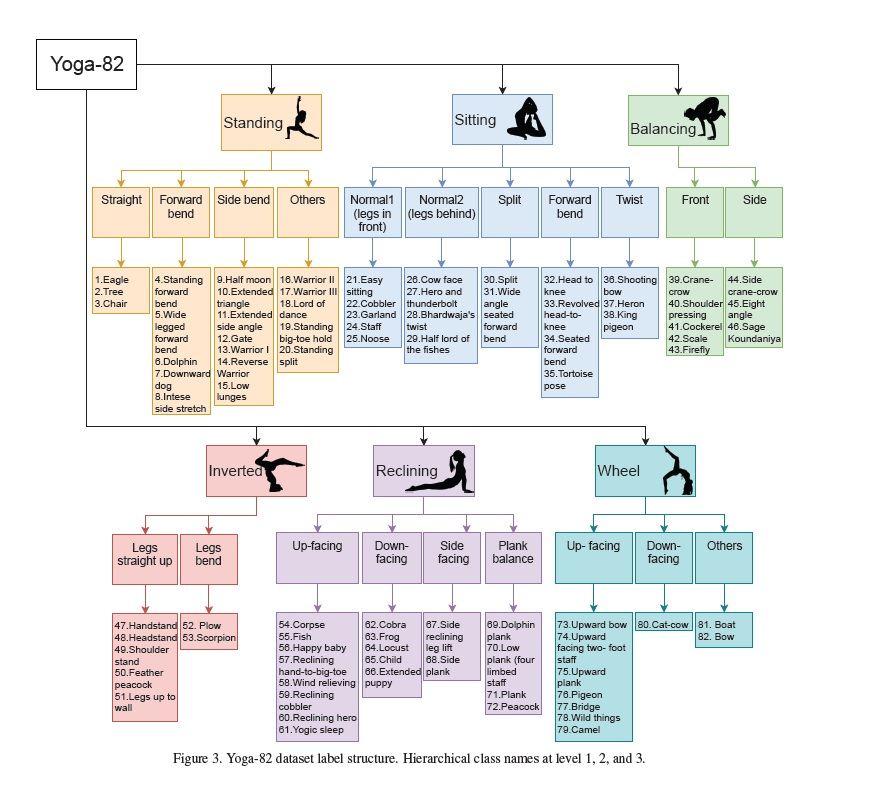

In [4]:
print('From M. Verma, S. Kumawat, Y. Nakashima, and S. Raman. Yoga-82: A new dataset for fine-grained classification of human poses.    In IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops (CVPRW), pages 4472–4479, 2020.')
Image(filename='../Plots/Yoga82/labels.jpg') 

In [5]:
'''CREATE LABEL DICTIONARY SINCE THEY ARE NOT THE SAME AS ON THE PICTURE IN THE STUDY'''

trans82 = {'18':'Eagle',
'68':'Tree',
'8':'Chair',
'60':'Standing',
'77':'Wide legged forward bend',
'16':'Dolphin',
'17':'Downward dog',
'36':'Intese side stretch',
'31':'Half moon',
'22':'Extended triangle',
'21':'Extended side angle',
'29':'Gate',
'75':'Warrior I',
'81':'ReverseWarrior',
'40':'Low lunges',
'74':'Warrior II',
'73':'Warrior III',
'39':'Lord of dance',
'62':'Standing big-toe hold',
'61':'Standing split',
'57':'Easy sitting',
'3':'Cobbler',
'28':'Garland',
'59':'Staff',
'41':'Noose',
'13':'Cow face',
'72':'Hero and thunderbolt',
'1':'Bhardwajas twist',
'30':'Half lord of the fishes',
'58':'Split',
'76':'Wide angle seated forward bend',
'34':'Head to knee',
'49':'Revolvedhead-toknee',
'52':'Seated forward bend',
'67':'Tortoise pose',
'0':'Shooting bow',
'35':'Heron',
'47':'King pigeon',
'14':'Cranecrow',
'53':'Shoulder pressing',
'11':'Cockerel',
'50':'Scale',
'24':'Firefly',
'55':'Side crane-crow',
'19':'Eight angle',
'46':'Sage Koundaniya',
'32':'Handstand',
'63':'Headstand',
'64':'Shoulderstand',
'23':'Feather peacock',
'37':'Legs up to wall',
'45':'Plow',
'51':'Scorpion',
'12':'Corpse',
'25':'Fish',
'33':'Happy baby',
'48':'Reclining hand-to-big-toe',
'79':'Wind relieving',
'65':'Reclining cobbler',
'66':'Reclining hero',
'80':'Yogic sleep',
'10':'Cobra',
'27':'Frog',
'38':'Locust',
'9':'Child',
'20':'Extended puppy',
'54':'Side reclining leg lift',
'56':'Side plank',
'15':'Dolphin plank',
'26':'Low plank (four limbedstaff)',
'44':'Plank',
'42':'Peacock',
'69':'Upward bow',
'70':'Upward facing two- foot staff',
'71':'Upward plank',
'43':'Pigeon',
'5':'Bridge',
'78':'Wild things',
'6':'Camel',
'7':'Cat-cow',
'2':' Boat',
'4':' Bow'}
#trans2 = {(str(int(key) - 1)):v for key,v in trans.items()}
trans82 = {int(k):str(v) for k,v in trans82.items()}
trans82_x = sorted(trans82.items())
#for key, value in sorted(trans82.items()): # Note the () after items!
 #   print(key, value)

trans20 = { '0': 'staright', '1': 'forward bend', '2': 'side bend', '3': 'others', '4': 'frontleg', '5': 'behindleg', 
         '6': 'split', '7': 'ffw bend', '8': 'twist', '9': 'front', '10': 'side', 
        '11': 'legs up', '12': 'legs bend', '13': 'up-facing', '14': 'down-facing', '15': 'side-facing', 
         '16': 'plank balance', '17': 'up facing', '18': 'down facing', '19': 'other'}

trans = {'0': 'standing', '1': 'sitting', '2': 'balancing', '3': 'inverted', '4': 'reclining', '5': 'wheel'}

In [6]:
"""function to download images from the given url list"""

def download_data(pose):
    #pose = pose + '.txt'
    import os

# path to download
# images_dir = '../data/Yoga-82/YOGA_downloads/' 
#     os.makedirs(images_dir, exist_ok=True)
    
    
#     open_dir = '../data/Yoga-82/Yoga-82/yoga_dataset_links/'
#     pathOpen = os.path.join(open_dir, pose)
    
#     with open(pathOpen, 'r') as f:
#         lines = f.readlines()
#         for line in lines:
#             print(line)
#             name, link = line.split()
#             #print(name, link)
#             folder, filename = name.split('/')
#             folderPath =  os.path.join(images_dir, folder)
#             os.makedirs(folderPath, exist_ok=True)

#             path_to_save = os.path.join(images_dir, name)
#             if  not os.path.isfile(filename):
#                 print('Downloading from: ' + link + 'file: '+ filename)
#                 try:
#                     urllib.request.urlretrieve(link, path_to_save)
#                 except Exception as inst:
#                     print(inst)

In [7]:
open_dir = '../data/Yoga-82/Yoga-82/yoga_dataset_links/'
# filenamesToOpen = []

# # Iterate directory
# for path in os.listdir(open_dir):
#     # check if current path is a file
#     if os.path.isfile(os.path.join(open_dir, path)):
#         filenamesToOpen.append(path)

# for i in range(len(filenamesToOpen)):
#     try:
#         download_data(filenamesToOpen[i+20]) #apply function 
#     except:
#         pass

# CLEANING:


- Many links contained whitespace, corrected them 
- program could run all the links, but still many not available
- some downloaded images were blank - deleted them

Furteher cleaning to ensure the quality of the dataset: (see Clened data below)
- Illustrations were named with 0_xxx were clipart and illustrations - deleted
- Manually deleted (overviewing the downloaded images) watermarked pictures, and multiperson pictures
- not handeld: - check test data - no white laboratory

            

In [8]:
'''DELETE EMPTY PICTURES'''

# import cv2

# def check_empty_img(img):
#     image = cv2.imread(img)
#     if image is None:
#         print(img)
#         try:
#             os.remove(img)
#         except:
#             pass
#     else:
#         pass 
        
        
# img_path = '../data/Yoga-82/YOGA_downloads/' 
# df = Train_df #Test_df  ##SHOULD BE DONE BOTH
# num = df.shape[0]
# for i in range(num):
#         path = df['YogaPoses'].iloc[i] + '/' + df['ImageNumbers'].iloc[i]
#         imgs = img_path + path
#         check_empty_img(imgs)

'DELETE EMPTY PICTURES'

# <center>EXPLORE Yoga-82 DATASET</center>

## > Original: 

In [9]:
path = '../data/Yoga-82/Yoga-82/'
img_path = path+'yoga_dataset_links/'
train_file = path+'yoga_train.txt'
test_file = path+'yoga_test.txt'
    
#test_test ='yoga_test.txt'
f1 = open(train_file, 'r')
f2 = open(test_file, 'r')
train_lines = f1.readlines()

f1.close()
train_samples = len(train_lines)
print('train_samples: ', train_samples)

test_lines = f2.readlines()
f2.close()
test_samples = len(test_lines)

print('test_samples:', test_samples)
print('all: ', test_samples+train_samples)

train_samples:  20994
test_samples: 7456
all:  28450


In [10]:
'''TRAINING DATA'''
original_train_df = []
for i in range(len(train_lines)):
    x = train_lines[i].rstrip()
    x = x.replace('/', ',')
    x = x.split(",")
    original_train_df.append(x)
original_train_df = pd.DataFrame(original_train_df, columns =['YogaPoses', 'ImageNumbers', 
                                      'label of class_6' , 'label of class_20' , 'label of class_82'])
#original_train_df.head()

In [11]:
'''TEST DATA'''
original_test_df = []
for i in range(len(test_lines)):
    x = test_lines[i].rstrip()
    x = x.replace('/', ',')
    x = x.split(",")
    original_test_df.append(x)
original_test_df = pd.DataFrame(original_test_df, columns =['YogaPoses', 'ImageNumbers', 
                                      'label of class_6' , 'label of class_20' , 'label of class_82'])
#original_test_df.head()

In [12]:
print('classes in provided training data: ',len(original_train_df['YogaPoses'].unique()))

classes in provided training data:  82


In [13]:
print('classes in provided test data: ', len(original_test_df['YogaPoses'].unique()))

classes in provided test data:  82


### Class balance in original Train vs Test by level

#### level 3 - 82 classes

In [14]:
TestGrouped_df = original_test_df[['ImageNumbers','label of class_82']].groupby(['label of class_82']).count()
TrainGrouped_df = original_train_df[['ImageNumbers','label of class_82']].groupby(['label of class_82']).count()
df = pd.merge(TestGrouped_df, TrainGrouped_df, on='label of class_82')
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_82']=df.index
df.reset_index
df=df.replace({"label of class_82": trans82})
df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
df['TestRatio'].max(), df['TestRatio'].min()

(0.29642857142857143, 0.20833333333333334)

#### level 2 - 20 classes

In [15]:
perfectTestGrouped_df = original_test_df[['ImageNumbers','label of class_20']].groupby(['label of class_20']).count()
perfectTrainGrouped_df = original_train_df[['ImageNumbers','label of class_20']].groupby(['label of class_20']).count()
df = pd.merge(perfectTestGrouped_df, perfectTrainGrouped_df, on='label of class_20')
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_20']=df.index
df.reset_index
df=df.replace({"label of class_20": trans20})
df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
df['TestRatio'].max(), df['TestRatio'].min()

(0.28324468085106386, 0.2470997679814385)

#### level 1 - 6 classes

In [16]:
perfectTestGrouped_df = original_test_df[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count()
perfectTrainGrouped_df = original_train_df[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count()
df = pd.merge(perfectTestGrouped_df, perfectTrainGrouped_df, on='label of class_6')
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_6']=df.index
df.reset_index
df=df.replace({"label of class_6": trans})
df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
df['TestRatio'].max(), df['TestRatio'].min()

(0.2765520779887122, 0.2599667774086379)

#### all level 

In [17]:
Test_df2 = original_test_df
Test_df2 = Test_df2.replace({"label of class_6": trans, "label of class_82": trans82, "label of class_20": trans20})
Train_df2 = original_train_df
Train_df2 = Train_df2.replace({"label of class_6": trans, "label of class_82": trans82, "label of class_20": trans20})
TestTree_df = Test_df2[['ImageNumbers','label of class_82', 'label of class_20', 'label of class_6']].groupby(['label of class_6', 'label of class_20','label of class_82']).count()
TrainTree_df = Train_df2[['ImageNumbers','label of class_82', 'label of class_20', 'label of class_6']].groupby(['label of class_6', 'label of class_20','label of class_82']).count()
DataTree_df  = pd.merge(TestTree_df, TrainTree_df, left_index=True, right_index=True)
DataTree_df = DataTree_df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
DataTree_df['All'] = DataTree_df['Test'] + DataTree_df['Train']
DataTree_df['label of class_6'] = DataTree_df.index.get_level_values(0)
DataTree_df['label of class_20'] = DataTree_df.index.get_level_values(1)
DataTree_df['label of class_82'] = DataTree_df.index.get_level_values(2)
#DataTree_df

Download more data?
For some of the classes it is hard to find more examples, maybe on other languages than english or sanskrit.
But the original results are also based on imbalanced data.

## > Succesfully Downloaded:

In [18]:
images_dir = '../data/Yoga-82/YOGA_downloads/' 

paths = [path.parts[-3:] for path in
         Path(images_dir).rglob('*.jpg')]
#print(paths)
Downloaded_df = pd.DataFrame(data=paths, columns=['FolderName','YogaPoses','ImageNumbers'])
Downloaded_df = Downloaded_df.drop(columns=['FolderName'])
print('successfully downloaded ', Downloaded_df.shape[0], 'from the provided: ', test_samples+train_samples)
print('this is: ', round((Downloaded_df.shape[0] / (test_samples+train_samples) * 100), 2), '%')

successfully downloaded  15136 from the provided:  28450
this is:  53.2 %


In [19]:
print('classes in the downloaded data: ', len(Downloaded_df['YogaPoses'].unique()))

classes in the downloaded data:  82


### Missing:

In [20]:
trainAndDown_df = original_train_df.merge(Downloaded_df.drop_duplicates(), on=['YogaPoses','ImageNumbers'], 
                   how='left', indicator=True)
trainAndDown_df2 = trainAndDown_df[trainAndDown_df['_merge'].str.contains('left_only')]
print('Missing from training data: ', trainAndDown_df2.shape[0])
print('this is: ', round((trainAndDown_df2.shape[0] / (train_samples) * 100), 2), '% from all train')

Missing from training data:  9736
this is:  46.38 % from all train


In [21]:
testAndDown_df = original_test_df.merge(Downloaded_df.drop_duplicates(), on=['YogaPoses','ImageNumbers'], 
                   how='left', indicator=True)
testAndDown_df2 = testAndDown_df[testAndDown_df['_merge'].str.contains('left_only')]
print('Missing from test data: ', testAndDown_df2.shape[0])
print('this is: ', round((testAndDown_df2.shape[0] / (test_samples) * 100), 2), '% from all test')

Missing from test data:  3578
this is:  47.99 % from all test


In [22]:
print('All missing from downloaded: ', trainAndDown_df2.shape[0] + testAndDown_df2.shape[0])

All missing from downloaded:  13314


In [23]:
AllOriginal_df = pd.concat([original_train_df, original_test_df], axis=0)
MissingfromALL_df = pd.concat([trainAndDown_df2, testAndDown_df2], axis=0)
print('Successfully downloaded: ', AllOriginal_df.shape[0] - MissingfromALL_df.shape[0])

Successfully downloaded:  15136


In [24]:
pd.set_option('display.max_rows', 82) #replace n with the number of columns you want to see completely

shouldBe_df = AllOriginal_df[['ImageNumbers','YogaPoses']].groupby(['YogaPoses']).count()
missing_df = MissingfromALL_df[['ImageNumbers','YogaPoses']].groupby(['YogaPoses']).count()
shouldBe_df['Missing']= missing_df['ImageNumbers']
shouldBe_df['differences in %'] = round(shouldBe_df['Missing'] / shouldBe_df['ImageNumbers'] * 100)
diff_df = shouldBe_df.sort_values(by=['differences in %'])
print('Missing in classes: ', min(diff_df['differences in %']), ' - ', max(diff_df['differences in %']), '%')

Missing in classes:  20.0  -  66.0 %


In [25]:
'''CREATE TEST AND TRAINING DATA SETS FROM THE DOWNLOADED DATA'''

Test_df = testAndDown_df
Test_df = Test_df[Test_df['_merge'].str.contains('both')]

Train_df = trainAndDown_df
Train_df = Train_df[Train_df['_merge'].str.contains('both')]

## > Cleaned:
### Without clipart, watermarks, phase multiples and multiperson



In [26]:
images_dir = '../data/Yoga-82/YOGA_downloads_withoutClipart' 

paths = [path.parts[-3:] for path in
         Path(images_dir).rglob('*.jpg')]

perfect_df = pd.DataFrame(data=paths, columns=['FolderName','YogaPoses','ImageNumbers'])
perfect_df = perfect_df.drop(columns=['FolderName'])
print('high quality is ', perfect_df.shape[0], 'from the provided: ', test_samples+train_samples)
print('this is: ', round((perfect_df.shape[0] / (test_samples+train_samples) * 100), 2), '% from the provided')
print('this is: ', round((perfect_df.shape[0] / (Downloaded_df.shape[0]) * 100), 2), '% from succesfully downloaded')

high quality is  8363 from the provided:  28450
this is:  29.4 % from the provided
this is:  55.25 % from succesfully downloaded


In [27]:
print('classes in cleaned: ', len(perfect_df['YogaPoses'].unique()))

classes in cleaned:  82


### Missing:

In [28]:
trainAndPerfect_df = original_train_df.merge(perfect_df.drop_duplicates(), on=['YogaPoses','ImageNumbers'], 
                   how='left', indicator=True)
trainAndPerfect_df = trainAndPerfect_df[trainAndPerfect_df['_merge'].str.contains('left_only')]
print('Missing from training data: ', trainAndPerfect_df.shape[0])
print('this is: ', round((trainAndPerfect_df.shape[0] / (train_samples) * 100), 2), '% from all train')

Missing from training data:  15027
this is:  71.58 % from all train


In [29]:
testAndPerfect_df = original_test_df.merge(perfect_df.drop_duplicates(), on=['YogaPoses','ImageNumbers'], 
                   how='left', indicator=True)
testAndPerfect_df = testAndPerfect_df[testAndPerfect_df['_merge'].str.contains('left_only')]
print('Missing from test data: ', testAndPerfect_df.shape[0])
print('this is: ', round((testAndPerfect_df.shape[0] / (test_samples) * 100), 2), '% from all test')

Missing from test data:  5060
this is:  67.86 % from all test


In [30]:
Downloaded_df = AllOriginal_df[['ImageNumbers','YogaPoses']].groupby(['YogaPoses']).count()
perfectGrouped_df = perfect_df[['ImageNumbers','YogaPoses']].groupby(['YogaPoses']).count()
Downloaded_df['Kept']= perfectGrouped_df['ImageNumbers']
Downloaded_df['Kept in %'] = round(Downloaded_df['Kept'] / Downloaded_df['ImageNumbers'] * 100)
diffPD_df = Downloaded_df.sort_values(by=['Kept in %'])
print('Deleted in classes compared to downloaded: ', min(diffPD_df['Kept in %']), ' - ', max(diffPD_df['Kept in %']), '%')

Deleted in classes compared to downloaded:  12.0  -  68.0 %


In [31]:
print('Missing: ', trainAndPerfect_df.shape[0] + testAndPerfect_df.shape[0])

Missing:  20087


In [32]:
MissingPerfectfromALL_df = pd.concat([trainAndPerfect_df, testAndPerfect_df], axis=0)
print('Successfully downloaded: ', AllOriginal_df.shape[0] - MissingPerfectfromALL_df.shape[0])

Successfully downloaded:  8363


In [33]:
pd.set_option('display.max_rows', 82) #replace n with the number of columns you want to see completely

shouldBeP_df = shouldBe_df.copy() 
missingPerfect_df = MissingPerfectfromALL_df[['ImageNumbers','YogaPoses']].groupby(['YogaPoses']).count()
shouldBeP_df['Missing']= missingPerfect_df['ImageNumbers']
shouldBeP_df['differences in %'] = round(shouldBeP_df['Missing'] / shouldBeP_df['ImageNumbers'] * 100)
diffP_df = shouldBeP_df.sort_values(by=['differences in %'])
print('Missing and deleted in classes compared to original: ', min(diffP_df['differences in %']), ' - ', max(diffP_df['differences in %']), '%')

Missing and deleted in classes compared to original:  32.0  -  88.0 %


In [34]:
'''CREATE TEST AND TRAINING DATA SETS FROM THE CLEANED DATA'''

PerfectTest_df = original_test_df.merge(perfect_df.drop_duplicates(), on=['YogaPoses','ImageNumbers'], how='left', indicator=True)
PerfectTest_df = PerfectTest_df[PerfectTest_df['_merge'].str.contains('both')]

PerfectTrain_df = original_train_df.merge(perfect_df.drop_duplicates(), on=['YogaPoses','ImageNumbers'], how='left', indicator=True)
PerfectTrain_df = PerfectTrain_df[PerfectTrain_df['_merge'].str.contains('both')]

# <center>CHECK CLASS BALANCE</center>

# Class balance in downloaded by level

In [35]:
AllOriginal_df2 =AllOriginal_df.copy()
AllOriginal_df2 = AllOriginal_df2.astype({"label of class_82":"int","label of class_20":"int", "label of class_6":"int"})
trans82 = {int(k):str(v) for k,v in trans82.items()}
trans20 = {int(k):str(v) for k,v in trans20.items()}
trans = {int(k):str(v) for k,v in trans.items()}
AllOriginal_df2 = AllOriginal_df2.replace({"label of class_82": trans82, "label of class_20": trans20, "label of class_6": trans})

Grouped82_df = AllOriginal_df2[['ImageNumbers','label of class_82']].groupby(['label of class_82']).count()
Grouped20_df = AllOriginal_df2[['ImageNumbers','label of class_20']].groupby(['label of class_20']).count()
Grouped6_df = AllOriginal_df2[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count()
#df = pd.merge(TestGrouped_df, TrainGrouped_df, on='label of class_82')
#df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
#Grouped6_df

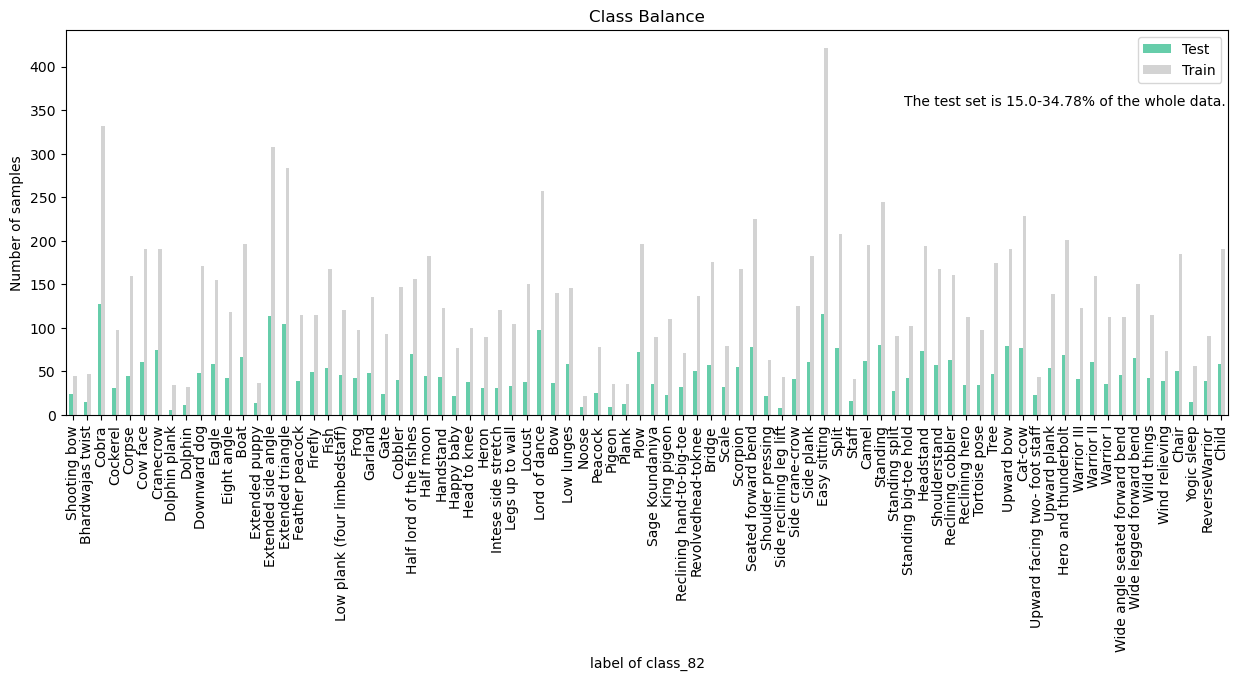

In [36]:
TestGrouped_df = Test_df[['ImageNumbers','label of class_82']].groupby(['label of class_82']).count()
TrainGrouped_df = Train_df[['ImageNumbers','label of class_82']].groupby(['label of class_82']).count()
df = pd.merge(TestGrouped_df, TrainGrouped_df, on='label of class_82')
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_82']=df.index
df.reset_index
df = df.astype({"label of class_82":"int"}) 
df=df.replace({"label of class_82": trans82})
df.plot.bar(x='label of class_82', rot=90, figsize=(15,5), color=["mediumaquamarine", "lightgray"])
plt.ylabel('Number of samples')
plt.title('Class Balance')

df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
ma = str(round(df['TestRatio'].max(),4) * 100)
mi = str(round(df['TestRatio'].min(),4) * 100)
string = ('The test set is ' + mi + '-' + ma + '% of the whole data.')
plt.text(70, 360, string, horizontalalignment='center', verticalalignment='center')
plt.savefig('../Plots/Yoga82/ClassBalance82.jpg')

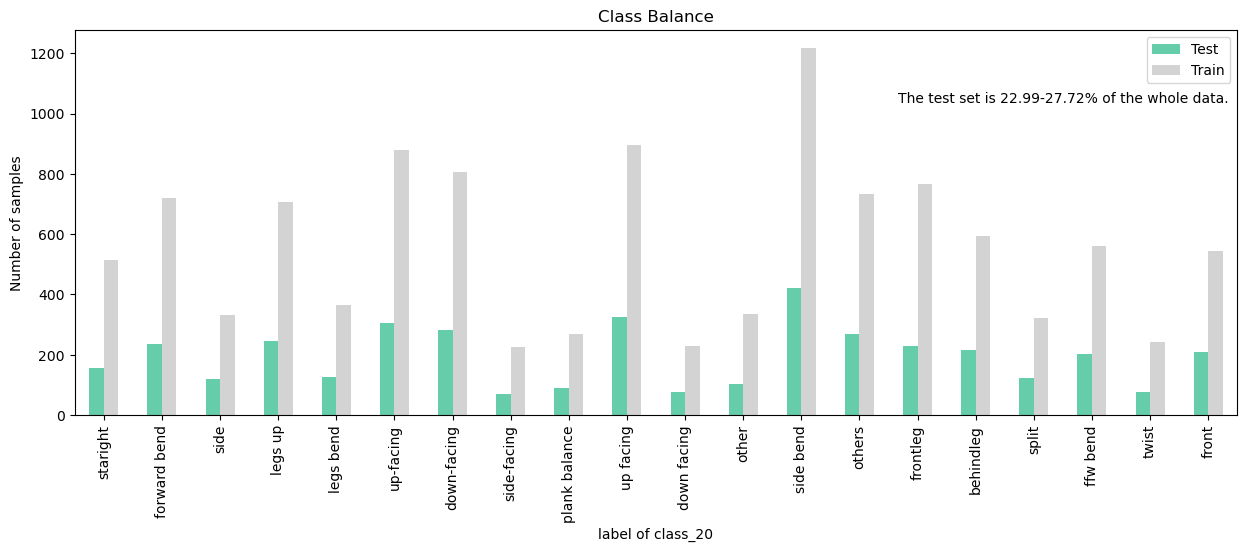

In [37]:
perfectTestGrouped_df = Test_df[['ImageNumbers','label of class_20']].groupby(['label of class_20']).count()
perfectTrainGrouped_df = Train_df[['ImageNumbers','label of class_20']].groupby(['label of class_20']).count()
df20 = pd.merge(perfectTestGrouped_df, perfectTrainGrouped_df, on='label of class_20')
df20 = df20.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df20['label of class_20']=df20.index
df20 = df20.astype({"label of class_20":"int"}) 
df20.reset_index
df20=df20.replace({"label of class_20": trans20})
df20.plot.bar(x='label of class_20', rot=90, figsize=(15,5), color=["mediumaquamarine", "lightgray"])
plt.ylabel('Number of samples')
plt.title('Class Balance')

df20['TestRatio'] = df20['Test'] / (df20['Test'] + df20['Train'])
ma = str(round(df20['TestRatio'].max(),4) * 100)
mi = str(round(df20['TestRatio'].min(),4) * 100)
string = ('The test set is ' + mi + '-' + ma + '% of the whole data.')
plt.text(16.5, 1050, string, horizontalalignment='center', verticalalignment='center')
plt.savefig('../Plots/Yoga82/ClassBalance20.jpg')

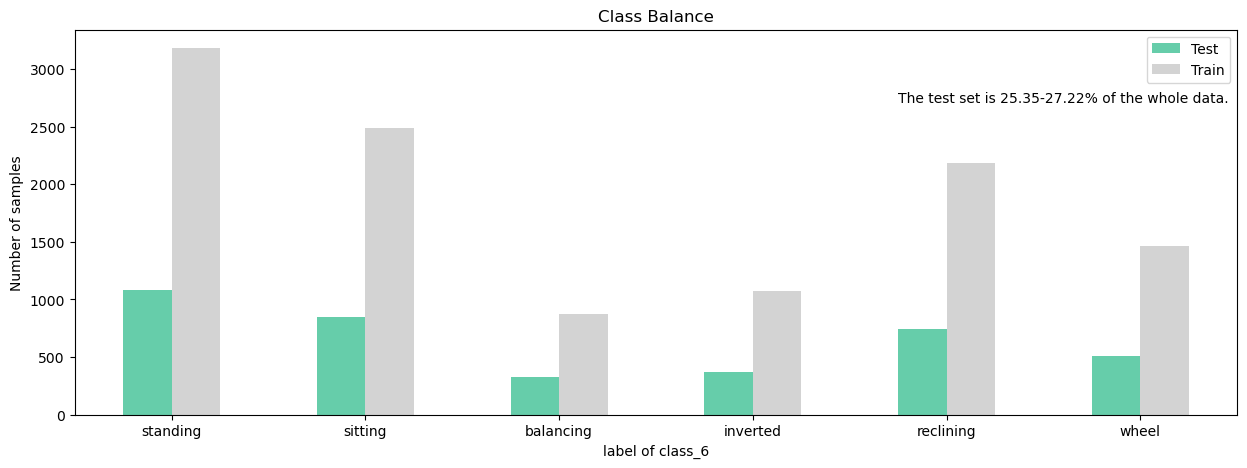

In [38]:
perfectTestGrouped_df = Test_df[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count()
perfectTrainGrouped_df = Train_df[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count()
df = pd.merge(perfectTestGrouped_df, perfectTrainGrouped_df, on='label of class_6')
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_6']=df.index
df = df.astype({"label of class_6":"int"}) 
df.reset_index
df=df.replace({"label of class_6": trans})
df.plot.bar(x='label of class_6', rot=0, figsize=(15,5), color=["mediumaquamarine", "lightgray"])
plt.ylabel('Number of samples')
plt.title('Class Balance')

df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
ma = str(round(df['TestRatio'].max(),4) * 100)
mi = str(round(df['TestRatio'].min(),4) * 100)
string = ('The test set is ' + mi + '-' + ma + '% of the whole data.')
plt.text(4.6, 2750, string, horizontalalignment='center', verticalalignment='center')
plt.savefig('../Plots/Yoga82/ClassBalance6.jpg')

In [39]:
trans82 = {int(k):str(v) for k,v in trans82.items()}
trans20 = {int(k):str(v) for k,v in trans20.items()}
trans = {int(k):str(v) for k,v in trans.items()}
Test_df2 = Test_df.astype({"label of class_82":"int","label of class_20":"int", "label of class_6":"int"})
Test_df2 = Test_df2.replace({"label of class_6": trans, "label of class_82": trans82, "label of class_20": trans20})
Train_df2 = Train_df.astype({"label of class_82":"int","label of class_20":"int", "label of class_6":"int"})
Train_df2 = Train_df2.replace({"label of class_6": trans, "label of class_82": trans82, "label of class_20": trans20})
TestTree_df = Test_df2[['ImageNumbers','label of class_82', 'label of class_20', 'label of class_6']].groupby(['label of class_6', 'label of class_20','label of class_82']).count()
TrainTree_df = Train_df2[['ImageNumbers','label of class_82', 'label of class_20', 'label of class_6']].groupby(['label of class_6', 'label of class_20','label of class_82']).count()

DataTree_df  = pd.merge(TestTree_df, TrainTree_df, left_index=True, right_index=True)
DataTree_df = DataTree_df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
DataTree_df['All'] = DataTree_df['Test'] + DataTree_df['Train']
DataTree_df['label of class_6'] = DataTree_df.index.get_level_values(0)
DataTree_df['label of class_20'] = DataTree_df.index.get_level_values(1)
DataTree_df['label of class_82'] = DataTree_df.index.get_level_values(2)
#DataTree_df
#DataTree_df['All'].sum()

In [40]:
DataTree_df2  = pd.concat([Test_df2, Train_df2],ignore_index=True)

df_pose = DataTree_df2[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count().reset_index()
df6 = pd.DataFrame(columns=('labels','parent','ImageNumbers'))
df_pose['parent'] = "total"
df_pose = df_pose.rename(columns={'label of class_6':'labels'})
df6 = pd.concat([df6,df_pose[['labels','parent','ImageNumbers']]])
#df6

df_pose = DataTree_df2[['ImageNumbers','label of class_20', 'label of class_6']].groupby(['label of class_6', 'label of class_20']).count().reset_index()
df20 = pd.DataFrame(columns=('labels','parent','ImageNumbers'))
df_pose['parent'] = df_pose['label of class_6']
df_pose = df_pose.rename(columns={'label of class_20':'labels'})
df20 = pd.concat([df20,df_pose[['labels','parent','ImageNumbers']]])
df20 = pd.concat([df20,df6[['labels','parent','ImageNumbers']]])
df20

df_pose = DataTree_df2[['ImageNumbers','label of class_82', 'label of class_20']].groupby(['label of class_20', 'label of class_82']).count().reset_index()
df82 = pd.DataFrame(columns=('labels','parent','ImageNumbers'))
df_pose['parent'] = df_pose['label of class_20']
df_pose = df_pose.rename(columns={'label of class_82':'labels'})
df82 = pd.concat([df82,df_pose[['labels','parent','ImageNumbers']]])
df82 = pd.concat([df82,df20[['labels','parent','ImageNumbers']]])
#df82

In [41]:
fig = go.Figure(go.Icicle(
    labels=df82['labels'],
    parents = df82['parent'],
    values = df82['ImageNumbers'],
    branchvalues="total",
    root_color="lightgray"
    #tiling = dict(orientation='v')
))
fig.update_layout(
    title_text="Class balance in Yoga-82 dataset", font_size=10, title_x=0.5,
    uniformtext=dict(minsize=15),#, mode='hide'),
    margin = dict(t=50, l=25, r=25, b=25),
    iciclecolorway = ["mediumaquamarine"],
    #autosize=False,
    #width=1000,
    #height=800
)
fig.show()
#fig.write_image('../Plots/Yoga82/ClassBalance_icicleChart.jpg')

In [42]:
fig2 = px.sunburst(DataTree_df, path=['label of class_6', 'label of class_20', 'label of class_82'], values='All', color='label of class_6',
                  color_discrete_sequence=["silver", "mediumaquamarine", "darkcyan", "teal", "lightseagreen", "grey"])
fig2.update_layout(title_text="Class balance in Yoga-82 dataset", font_size=10, title_x=0.5)
fig2.show()
#fig2.write_image('../Plots/Yoga82/ClassBalance_sunburst.jpg')

# Balance Train Test Ratio

In [43]:
Merged_df = pd.concat([Train_df, Test_df],ignore_index=True)
Merged_df2 = pd.concat([PerfectTrain_df, PerfectTest_df],ignore_index=True)
Merged_df.shape, Merged_df2.shape 

((15136, 6), (8363, 6))

In [44]:
from sklearn.model_selection import train_test_split

Train_df, Test_df = train_test_split(Merged_df, test_size=0.3, random_state=0, stratify=Merged_df['label of class_82'])
PerfectTrain_df, PerfectTest_df = train_test_split(Merged_df2, test_size=0.3, random_state=0, stratify=Merged_df2['label of class_82'])
PerfectTrain_df.shape,PerfectTest_df.shape, Train_df.shape, Test_df.shape

((5854, 6), (2509, 6), (10595, 6), (4541, 6))

# Class balance in Cleaned Test vs Train by level

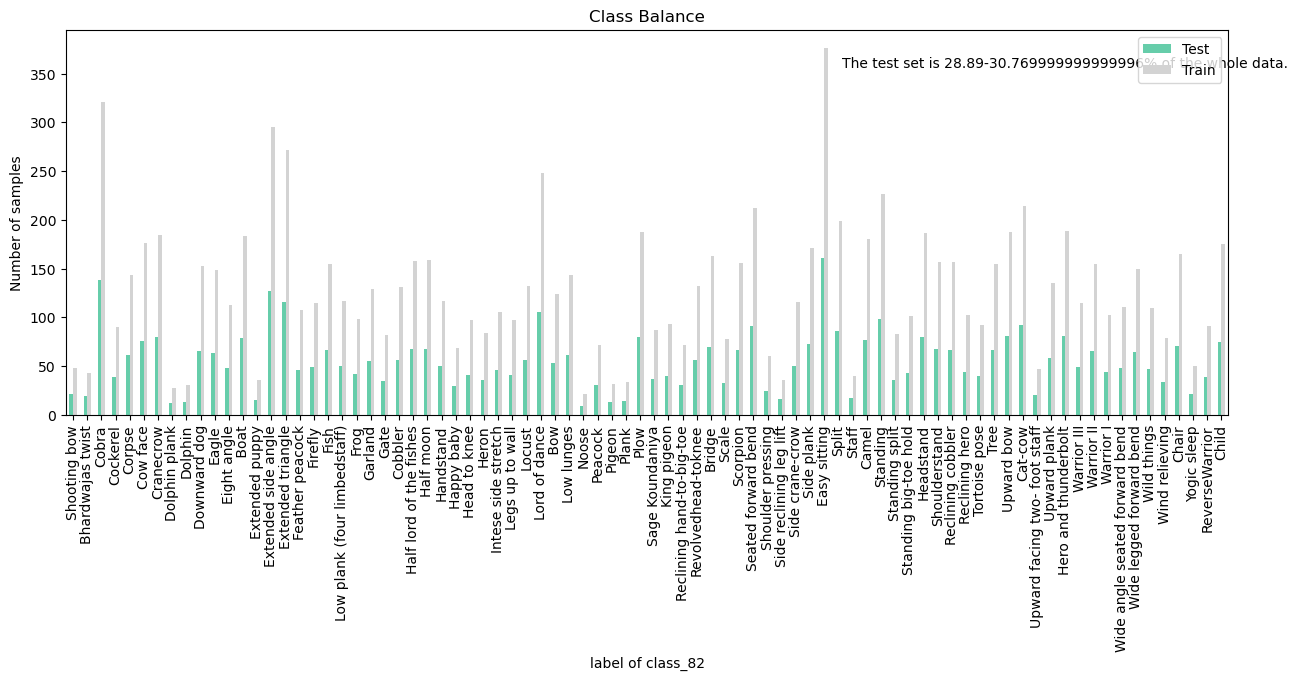

In [45]:
TestGrouped_df = Test_df[['ImageNumbers','label of class_82']].groupby(['label of class_82']).count()
TrainGrouped_df = Train_df[['ImageNumbers','label of class_82']].groupby(['label of class_82']).count()
df = pd.merge(TestGrouped_df, TrainGrouped_df, on='label of class_82')
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_82']=df.index
df.reset_index
df = df.astype({"label of class_82":"int"}) 

df=df.replace({"label of class_82": trans82})
df.plot.bar(x='label of class_82', rot=90, figsize=(15,5), color=["mediumaquamarine", "lightgray"])
plt.ylabel('Number of samples')
plt.title('Class Balance')

df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
ma = str(round(df['TestRatio'].max(),4) * 100)
mi = str(round(df['TestRatio'].min(),4) * 100)
string = ('The test set is ' + mi + '-' + ma + '% of the whole data.')
plt.text(70, 360, string, horizontalalignment='center', verticalalignment='center')
plt.savefig('../Plots/Yoga82/ClassBalance82.jpg')

In [46]:
perfectTestGrouped_df = Test_df[['ImageNumbers',"label of class_20"]].groupby(["label of class_20"]).count()
perfectTrainGrouped_df = Train_df[['ImageNumbers',"label of class_20"]].groupby(["label of class_20"]).count()
df = pd.merge(perfectTestGrouped_df, perfectTrainGrouped_df, on="label of class_20")
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_20']=df.index
df.reset_index
df=df.replace({"label of class_20": trans})
df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
df['TestRatio'].max(), df['TestRatio'].min()

(0.30180180180180183, 0.2988826815642458)

In [47]:
perfectTestGrouped_df = Test_df[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count()
perfectTrainGrouped_df = Train_df[['ImageNumbers','label of class_6']].groupby(['label of class_6']).count()
df = pd.merge(perfectTestGrouped_df, perfectTrainGrouped_df, on='label of class_6')
df = df.rename(columns={"ImageNumbers_x": "Test", "ImageNumbers_y": "Train"})
df['label of class_6']=df.index
df=df.replace({"label of class_6": trans})
df['TestRatio'] = df['Test'] / (df['Test'] + df['Train'])
df['TestRatio'].max(), df['TestRatio'].min()

(0.30033003300330036, 0.29958391123439665)

## > CREATE TRAINING AND TEST DATASETS

In [48]:
path = '../data/'

#### Downloaded

In [49]:
Train_df.to_csv(path + 'Yoga-82/TrainBalanced_df.csv')
Test_df.to_csv(path + 'Yoga-82/TestBalanced_df.csv')
Train_df.shape, Test_df.shape

((10595, 6), (4541, 6))

#### Cleaned

In [50]:
PerfectTrain_df.to_csv(path + 'Yoga-82/PerfectTrainBalanced_df.csv')
PerfectTest_df.to_csv(path + 'Yoga-82/PerfectTestBalanced_df.csv')
PerfectTrain_df.shape, PerfectTest_df.shape

((5854, 6), (2509, 6))

#### Create small subsample to build the model

In [51]:
'''CREATE TRIAL DATA TO BUILD THE MODEL'''

'''The model was run on the ITU HPC cluster with the entire data set.'''

TryTrain_df = PerfectTrain_df.groupby(['YogaPoses']).sample(2)
TryTest_df = PerfectTest_df.groupby(['YogaPoses']).sample(1)
TryTrain_df.shape, TryTest_df.shape

((164, 6), (82, 6))

# Image Preprocessing

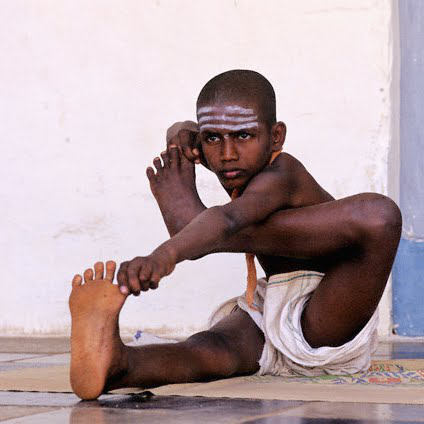

None
(424, 424)
RGB


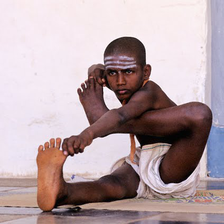

None
(224, 224)
RGB


In [52]:
imgFolder = '../data/Yoga-82/YOGA_downloads_withoutClipart/' 
num = len(train_lines)
#print(num)
# for 1 picture
for i in range(1):  #(num):
    path = train_lines[i+25].split(',')[0]
    imgs = imgFolder + path
    try:
        image = PIL.Image.open(imgs).convert("RGB")
        display(image)
        print(image.format)
        print(image.size)
        print(image.mode)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.resize((224,224), PIL.Image.ANTIALIAS)
        display(image)
        print(image.format)
        print(image.size)
        print(image.mode)
    except Exception as inst:
                    print(inst)

computation of high numeric values may become more complex.
To reduce this we can normalize the values to range from 0 to 1.

In this way, the numbers will be small and the computation becomes easier and faster.
As the pixel values range from 0 to 256, apart from 0 the range is 255. So dividing all the values by 255 will convert it to range from 0 to 1.

# normalize data by 255 (RGB values 0-256)

In [53]:
def preprocess(inputs):
    
    inputs /=255.
    
    return inputs

# <center>Modified Densenet-201 architecture</center>


# keras_densenet_modified.py
This code is based on the git hub repository of: 

Verma, M., Kumawat, S., Nakashima, Y., & Raman, S. (2020). Yoga-82: a new dataset for fine-grained classification of human poses. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops (pp. 1038-1039).

https://github.com/maniver7/yoga-82

In [54]:
BASE_WEIGTHS_PATH = (
    'https://github.com/keras-team/keras-applications/')

DENSENET201_WEIGHT_PATH_NO_TOP = (
    BASE_WEIGTHS_PATH +
    'densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5')

def dense_block(x, blocks, name):
    """A dense block.

    # Arguments
        x: input tensor.
        blocks: integer, the number of building blocks.
        name: string, block label.

    # Returns
        output tensor for the block.
    """
    for i in range(blocks):
        x = conv_block(x, 32, name=name + '_block' + str(i + 1))
    return x


def transition_block(x, reduction, name):
    """A transition block.

    # Arguments
        x: input tensor.
        reduction: float, compression rate at transition layers.
        name: string, block label.

    # Returns
        output tensor for the block.
    """
    bn_axis = 3 if backend.image_data_format() == 'channels_last' else 1
    x = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                  name=name + '_bn')(x)
    x = layers.Activation('relu', name=name + '_relu')(x)
    x = layers.Conv2D(int(backend.int_shape(x)[bn_axis] * reduction), 1,
                      use_bias=False,
                      name=name + '_conv')(x)
    x = layers.AveragePooling2D(2, strides=2, name=name + '_pool')(x)
    return x


def conv_block(x, growth_rate, name):
    """A building block for a dense block.

    # Arguments
        x: input tensor.
        growth_rate: float, growth rate at dense layers.
        name: string, block label.

    # Returns
        Output tensor for the block.
    """
    bn_axis = 3 if backend.image_data_format() == 'channels_last' else 1
    x1 = layers.BatchNormalization(axis=bn_axis,
                                   epsilon=1.001e-5,
                                   name=name + '_0_bn')(x)
    x1 = layers.Activation('relu', name=name + '_0_relu')(x1)
    x1 = layers.Conv2D(4 * growth_rate, 1,
                       use_bias=False,
                       name=name + '_1_conv')(x1)
    x1 = layers.BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                   name=name + '_1_bn')(x1)
    x1 = layers.Activation('relu', name=name + '_1_relu')(x1)
    x1 = layers.Conv2D(growth_rate, 3,
                       padding='same',
                       use_bias=False,
                       name=name + '_2_conv')(x1)
    x = layers.Concatenate(axis=bn_axis, name=name + '_concat')([x, x1])
    return x


def DenseNet(blocks,
             include_top=True,
             weights='imagenet',
             input_tensor=None,
             input_shape=None,
             pooling=None,
             classes=1000,
             **kwargs):
    """Instantiates the DenseNet architecture.

    Optionally loads weights pre-trained on ImageNet.
    Note that the data format convention used by the model is
    the one specified in your Keras config at `~/.keras/keras.json`.

    # Arguments
        blocks: numbers of building blocks for the four dense layers.
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization),
              'imagenet' (pre-training on ImageNet),
              or the path to the weights file to be loaded.
        input_tensor: optional Keras tensor
            (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `'channels_last'` data format)
            or `(3, 224, 224)` (with `'channels_first'` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 32.
            E.g. `(200, 200, 3)` would be one valid value.
        pooling: optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional block.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional block, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.

    # Returns
        A Keras model instance.

    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    #global backend, layers, models, keras_utils
    #backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)

    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as `"imagenet"` with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=32,
                                      data_format=backend.image_data_format(),
                                      require_flatten=include_top,
                                      weights=weights)

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    bn_axis = 3 if backend.image_data_format() == 'channels_last' else 1

    x = layers.ZeroPadding2D(padding=((3, 3), (3, 3)))(img_input)
    x = layers.Conv2D(64, 7, strides=2, use_bias=False, name='conv1/conv')(x)
    x = layers.BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='conv1/bn')(x)
    x = layers.Activation('relu', name='conv1/relu')(x)
    x = layers.ZeroPadding2D(padding=((1, 1), (1, 1)))(x)
    x = layers.MaxPooling2D(3, strides=2, name='pool1')(x)

    x = dense_block(x, blocks[0], name='conv2')
    x = transition_block(x, 0.5, name='pool2')
    x = dense_block(x, blocks[1], name='conv3')
    
    x = transition_block(x, 0.5, name='pool3')
    x1=x
    x = dense_block(x, blocks[2], name='conv4')
    
    x = transition_block(x, 0.5, name='pool4')
    x2=x
    x = dense_block(x, blocks[3], name='conv5')

    x = layers.BatchNormalization(
        axis=bn_axis, epsilon=1.001e-5, name='bn')(x)
    x = layers.Activation('relu', name='relu')(x)

    if include_top:
        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = layers.Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D(name='max_pool')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = tf.keras.utils.get_source_inputs(input_tensor) #tf.keras.utils.get_source_inputs
    else:
        inputs = img_input

    # Create model.
    model = models.Model(inputs, [x1,x2,x], name='densenet201_hir')
    
    # Load weights.
    
    if weights == 'imagenet':
        
        weights_path = keras_utils.get_file(
            'densenet201_weights_tf_dim_ordering_tf_kernels_notop.h5',
            DENSENET201_WEIGHT_PATH_NO_TOP,
            cache_subdir='models',
            file_hash='c13680b51ded0fb44dff2d8f86ac8bb1')

        model.load_weights(weights_path)
    #elif weights is not None:
    #    model.load_weights(weights)

    return model

def DenseNet201_hir(include_top=True,
                weights='imagenet',
                input_tensor=None,
                input_shape=None,
                pooling=None,
                classes=1000,
                **kwargs):
    return DenseNet([6, 12, 48, 32],
                    include_top, weights,
                    input_tensor, input_shape,
                    pooling, classes,
                    **kwargs)


def preprocess_input(x, data_format=None, **kwargs):
    """Preprocesses a numpy array encoding a batch of images.

    # Arguments
        x: a 3D or 4D numpy array consists of RGB values within [0, 255].
        data_format: data format of the image tensor.

    # Returns
        Preprocessed array.
    """
    return imagenet_utils.preprocess_input(x, data_format,
                                           mode='torch', **kwargs)

setattr(DenseNet201_hir, '__doc__', DenseNet.__doc__)

# models.py

This code is the modification of the code from the git hub repository of: 

Verma, M., Kumawat, S., Nakashima, Y., & Raman, S. (2020). Yoga-82: a new dataset for fine-grained classification of human poses. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops (pp. 1038-1039).

https://github.com/maniver7/yoga-82

In [55]:
def preprocess(inputs):
    inputs /=255
    return inputs


def process_data(df,img_path,train=True):
    num = df.shape[0]
    
    data = np.zeros((num,224,224,3),dtype='float32')
    x1_labels = np.zeros(num,dtype='int')
    x2_labels = np.zeros(num,dtype='int')
    x3_labels = np.zeros(num,dtype='int')

    for i in range(num):
        path = df['YogaPoses'].iloc[i] + '/' + df['ImageNumbers'].iloc[i]
        
        x1_label = df['label of class_6'].iloc[i]
        x2_label = df['label of class_20'].iloc[i]
        x3_label = df['label of class_82'].iloc[i]

        imgs = img_path + path
        if train:
                image = PIL.Image.open(imgs).convert("RGB")
                image = image.resize((224,224), PIL.Image.ANTIALIAS)
                data[i][:][:][:] = image
                x1_labels[i] = x1_label
                x2_labels[i] = x2_label
                x3_labels[i] = x3_label
            
        else:
            image = PIL.Image.open(imgs).convert("RGB")
            image = image.resize((224,224), PIL.Image.ANTIALIAS)
            data[i][:][:][:] = image
            x1_labels[i] = x1_label
            x2_labels[i] = x2_label
            x3_labels[i] = x3_label
    
    return data, x1_labels, x2_labels, x3_labels


def generator_train_batch(df,batch_size,num_classes,img_path):
    
    class_6 = num_classes[0]
    class_20 = num_classes[1]
    class_82 = num_classes[2]
    while True:
        
            df_shuffled = df.sample(frac=1, random_state=4)
            num = df_shuffled.shape[0]
            for i in range(0, num, batch_size):
                x_train, x1_labels, x2_labels, x3_labels = process_data(df_shuffled[i:(i+batch_size)],img_path,train=True)
                x = preprocess(x_train)
                y1 = np_utils.to_categorical(np.array(x1_labels), class_6)
                y2 = np_utils.to_categorical(np.array(x2_labels), class_20)
                y3 = np_utils.to_categorical(np.array(x3_labels), class_82)
                y = [y1,y2,y3]
                yield x, y

def generator_val_batch(df,batch_size,num_classes,img_path):
    class_6 = num_classes[0]
    class_20 = num_classes[1]
    class_82 = num_classes[2]
    
    while True:
            num = df.shape[0]
            for i in range(0,num,batch_size):
                y_test,y1_labels, y2_labels, y3_labels = process_data(df[i:(i+batch_size)],img_path,train=False)
                x = preprocess(y_test)
                y1 = np_utils.to_categorical(np.array(y1_labels), class_6)
                y2 = np_utils.to_categorical(np.array(y2_labels), class_20)
                y3 = np_utils.to_categorical(np.array(y3_labels), class_82)
                test_data = x
                y = [y1,y2,y3]
                yield test_data, y

In [56]:
def dense_block(x, blocks, name):
    """A dense block.
    # Arguments
        x: input tensor.
        blocks: integer, the number of building blocks.
        name: string, block label.
    # Returns
        output tensor for the block.
    """
    for i in range(blocks):
        x = conv_block(x, 32, name=name + '_block' + str(i + 1))
    return x


def conv_block(x, growth_rate, name):
    """A building block for a dense block.
    # Arguments
        x: input tensor.
        growth_rate: float, growth rate at dense layers.
        name: string, block label.
    # Returns
        Output tensor for the block.
    """
    bn_axis = 3 #if backend.image_data_format() == 'channels_last' else 1
    x1 = BatchNormalization(axis=bn_axis,
                                   epsilon=1.001e-5,
                                   name=name + '_0_bn')(x)
    x1 = Activation('relu', name=name + '_0_relu')(x1)
    x1 = Conv2D(4 * growth_rate, 1,
                       use_bias=False,
                       name=name + '_1_conv')(x1)
    x1 = BatchNormalization(axis=bn_axis, epsilon=1.001e-5,
                                   name=name + '_1_bn')(x1)
    x1 = Activation('relu', name=name + '_1_relu')(x1)
    x1 = Conv2D(growth_rate, 3,
                       padding='same',
                       use_bias=False,
                       name=name + '_2_conv')(x1)
    x = Concatenate(axis=bn_axis, name=name + '_concat')([x, x1])
    return x

def model_one_class(
        input_shape = (224,224,3),
        class_6=6,
        class_20=20,
        class_82=82):
    # for results of sota papers
    inputs = Input(input_shape)
    
    base_model= DenseNet121(include_top=False, weights=None, input_tensor = inputs, backend = keras.backend , layers = keras.layers , models = keras.models , utils = keras.utils)
    

    x=  base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(class_82, activation='softmax')(x)

    model = Model(inputs=inputs, outputs= [x])

    for layer in base_model.layers:
        layer.trainable = True
    
    return model


def dense201_hirar(
        input_shape = (224,224,3),
        class_6=6,
        class_20=20,
        class_82=82):
    
    # for variant 1 in the paper

    inputs = Input(input_shape)
    base_model= DenseNet201_hir(include_top=False, weights=None, input_tensor = inputs, backend = keras.backend , layers = keras.layers , models = keras.models , utils = keras.utils)
   
    [x1,x2,x] = base_model.output

    x1 = BatchNormalization( epsilon=1.001e-5, name = 'bn_class6_last')(x1)
    x1 = Activation('relu', name='relu_class6_last')(x1)                                                                                                                                                                                                                                                                    
    x1 = GlobalAveragePooling2D(name='GAvgPool_class6_last')(x1)
    x2 = BatchNormalization( epsilon=1.001e-5, name = 'bn_class20_last')(x2)
    x2 = Activation('relu', name='relu_class20_last')(x2)
    x2 = GlobalAveragePooling2D(name='GAvgPool_class20_last')(x2)
    x = GlobalAveragePooling2D()(x)

    x1 = Dense(class_6, activation= 'softmax')(x1)
    x2 = Dense(class_20, activation= 'softmax')(x2)
    x = Dense(class_82, activation='softmax')(x)

    model = Model(inputs, [x1,x2,x])

    for layer in base_model.layers:
        layer.trainable = True
    
    return model

def dense201_hirar_6same20(
        input_shape = (224,224,3),
        class_6=6,
        class_20=20,
        class_82=82):
    
    # for variant 2 in the paper
    inputs = Input(input_shape)
    base_model= DenseNet201_hir(include_top=False, weights=None, input_tensor = inputs, backend = keras.backend , layers = keras.layers , models = keras.models , utils = keras.utils)

    [null,x2,x] = base_model.output

    x1 = BatchNormalization(epsilon=1.001e-5, name = 'bn_class6_last')(x2)
    x1 = Activation('relu', name='relu_class6_last')(x1)
    x1 = GlobalAveragePooling2D(name='GAvgPool_class6_last')(x1)
    x2 = BatchNormalization(epsilon=1.001e-5, name = 'bn_class20_last')(x2)
    x2 = Activation('relu', name='relu_class20_last')(x2)
    x2 = GlobalAveragePooling2D(name='GAvgPool_class20_last')(x2)
    x = GlobalAveragePooling2D()(x)

    x1 = Dense(class_6, activation= 'softmax')(x1)

    x2 = Dense(class_20, activation= 'softmax')(x2)

    x = Dense(class_82, activation='softmax')(x)

    model = Model(inputs, [x1,x2,x])

    for layer in base_model.layers:
        layer.trainable = True
    
    return model


def dense201_hirar_new(
        input_shape = (224,224,3),
        class_6=6,
        class_20=20,
        class_82=82):

    # for variant 3 in the paper

    inputs = Input(input_shape)
    base_model= DenseNet201_hir(include_top=False, weights=None, input_tensor = inputs, backend = keras.backend , layers = keras.layers , models = keras.models , utils = keras.utils)
    
    [x1,x2,x] = base_model.output

    x1 = dense_block(x1, 32, name='denseblockClass6')


    x1 = BatchNormalization( epsilon=1.001e-5, name = 'bn_class6_last')(x1)
    x1 = Activation('relu', name='relu_class6_last')(x1)
    x1 = GlobalAveragePooling2D(name='GAvgPool_class6_last')(x1)
    x2 = BatchNormalization( epsilon=1.001e-5, name = 'bn_class20_last')(x2)
    x2 = Activation('relu', name='relu_class20_last')(x2)
    x2 = GlobalAveragePooling2D(name='GAvgPool_class20_last')(x2)
    x = GlobalAveragePooling2D()(x)

    x1 = Dense(class_6, activation= 'softmax')(x1)

    x2 = Dense(class_20, activation= 'softmax')(x2)

    x = Dense(class_82, activation='softmax')(x)

    model = Model(inputs, [x1,x2,x])

    for layer in base_model.layers:
        layer.trainable = True
    
    return model

# train_yoga.py

This code is the modification of the code from the git hub repository of: 

Verma, M., Kumawat, S., Nakashima, Y., & Raman, S. (2020). Yoga-82: a new dataset for fine-grained classification of human poses. In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops (pp. 1038-1039).

https://github.com/maniver7/yoga-82

In [57]:
model = dense201_hirar()
#dense201_hirar_new()
#dense201_6same20()
#plot_model(model)

In [58]:
def preprocess(inputs):
    inputs /=255
    return inputs


def process_data(df,img_path,train=True):
    num = df.shape[0]
    
    data = np.zeros((num,224,224,3),dtype='float32')
    x1_labels = np.zeros(num,dtype='int')
    x2_labels = np.zeros(num,dtype='int')
    x3_labels = np.zeros(num,dtype='int')

    for i in range(num):
        path = df['YogaPoses'].iloc[i] + '/' + df['ImageNumbers'].iloc[i]
        
        x1_label = df['label of class_6'].iloc[i]
        x2_label = df['label of class_20'].iloc[i]
        x3_label = df['label of class_82'].iloc[i]

        imgs = img_path + path
        if train:
                image = PIL.Image.open(imgs).convert("RGB")
                image = image.resize((224,224), PIL.Image.ANTIALIAS)
                data[i][:][:][:] = image
                x1_labels[i] = x1_label
                x2_labels[i] = x2_label
                x3_labels[i] = x3_label
            
        else:
            image = PIL.Image.open(imgs).convert("RGB")
            image = image.resize((224,224), PIL.Image.ANTIALIAS)
            data[i][:][:][:] = image
            x1_labels[i] = x1_label
            x2_labels[i] = x2_label
            x3_labels[i] = x3_label
    
    return data, x1_labels, x2_labels, x3_labels


def generator_train_batch(df,batch_size,num_classes,img_path):
    
    class_6 = num_classes[0]
    class_20 = num_classes[1]
    class_82 = num_classes[2]
    while True:
        
            df_shuffled = df.sample(frac=1, random_state=4)
            num = df_shuffled.shape[0]
            for i in range(0, num, batch_size):
                x_train, x1_labels, x2_labels, x3_labels = process_data(df_shuffled[i:(i+batch_size)],img_path,train=True)
                x = preprocess(x_train)
                y1 = np_utils.to_categorical(np.array(x1_labels), class_6)
                y2 = np_utils.to_categorical(np.array(x2_labels), class_20)
                y3 = np_utils.to_categorical(np.array(x3_labels), class_82)
                y = [y1,y2,y3]
                yield x, y

def generator_val_batch(df,batch_size,num_classes,img_path):
    class_6 = num_classes[0]
    class_20 = num_classes[1]
    class_82 = num_classes[2]
    
    while True:
            num = df.shape[0]
            for i in range(0,num,batch_size):
                y_test,y1_labels, y2_labels, y3_labels = process_data(df[i:(i+batch_size)],img_path,train=False)
                x = preprocess(y_test)
                y1 = np_utils.to_categorical(np.array(y1_labels), class_6)
                y2 = np_utils.to_categorical(np.array(y2_labels), class_20)
                y3 = np_utils.to_categorical(np.array(y3_labels), class_82)
                test_data = x
                y = [y1,y2,y3]
                yield test_data, y

# Variant 1

In [59]:
def main():
    path = '../Results/Results_Yoga82_TRY/dense201_hirar/'
    img_path = '../data/Yoga-82/YOGA_downloads_withoutClipart/'  
    
    test_df = TryTest_df
    train_df = TryTrain_df
    
    num_classes = [6,20,82]
    batch_size = 10 #32  #164 training samples, 82 test
    epochs = 2

    model = dense201_hirar()
    #model.load_weights('weights_betweenhirarModify_lw111_6and20ConnectSame_nopre_mix_.0003.hdf5')

    lr = 0.003 # orig= 0.003
    sgd = SGD(learning_rate=lr, momentum=0.9, nesterov=False)
    #adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    model.compile(loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'], loss_weights=[1,1,1], optimizer= sgd, metrics=['accuracy'])#, 'top_k_categorical_accuracy'])
    
    # fix random seed for reproducibility
    #seed = 7
    #tf.random.set_seed(seed)
    
    
    #model.summary()
    # Open the file
    #with open(filename + 'modelSummary_V2.txt','w') as fh:
        # Pass the file handle in as a lambda function to make it callable
        #model.summary(print_fn=lambda x: fh.write(x + '\n'))
    
    csv_logger= CSVLogger(path + 'log_V1.csv')
    #callbacks = [checkpoint]


    # get the start time
    st = time.time()
    #save the Keras model or model weights at some frequency.
    # "val_loss" to monitor the model's total loss.
    #verbose: 1 displays messages when the callback takes an action.
    model.fit_generator(generator_train_batch(train_df, batch_size, num_classes,img_path),
                          steps_per_epoch = train_df.shape[0] // batch_size + 1,
                          epochs=epochs,
                          callbacks=[csv_logger],
                          validation_data=generator_val_batch(test_df, batch_size,num_classes,img_path),
                          validation_steps = test_df.shape[0] // batch_size + 1,
                          verbose=1)
    np.save(path + 'model_weights_V1.npy',model.get_weights())
    print('FIT ENDED')
    # get the end time
    et = time.time()
    # get execution time in minutes
    res = et - st
    final_res = res / 60
    print('Execution time:', final_res, 'minutes')

    model = dense201_hirar()
    model.compile(loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'], loss_weights=[1,1,1], optimizer= sgd, metrics=['accuracy'])#, 'top_k_categorical_accuracy'])
    model.set_weights(np.load(path + 'model_weights_V1.npy', allow_pickle=True))
    
    batch_size = 41
    test_steps_per_epoch = test_df.shape[0] // 41
    
    score = model.evaluate_generator(generator_val_batch(test_df,batch_size,num_classes,img_path),steps=test_steps_per_epoch, verbose=1)
    np.savetxt(path + 'score_V1.txt', score, fmt = '%d')
    ###################################################################
    #generate predictions
    y_predg = model.predict_generator(generator_val_batch(test_df, batch_size, num_classes, img_path), steps=test_steps_per_epoch, verbose=2)

    np.savetxt(path + 'probabilities6_V2.txt', y_predg[0], fmt = '%d')
    np.savetxt(path + 'probabilities20_V2.txt', y_predg[1], fmt = '%d')
    np.savetxt(path + 'probabilities82_V2.txt', y_predg[2], fmt = '%d')

    predictions6 = np.argmax(y_predg[0],axis=1)
    np.savetxt(path + 'predictions6.txt', predictions6, fmt='%d')
    predictions20 = np.argmax(y_predg[1],axis=1)
    np.savetxt(path + 'predictions20.txt', predictions20, fmt='%d')
    predictions82 = np.argmax(y_predg[2],axis=1)
    np.savetxt(path + 'predictions82.txt', predictions82, fmt='%d')
    #get true labels
    y_testlabels6 = np_utils.to_categorical(np.array(test_df['label of class_6']), 6)
    y_testlabels20 = np_utils.to_categorical(np.array(test_df['label of class_20']), 20)
    y_testlabels82 = np_utils.to_categorical(np.array(test_df['label of class_82']), 82)

    # confusion matrix
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels6,axis=1), predictions6, 6)
    torch.save(cm, path + 'cm6.pt')
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels20,axis=1), predictions20, 20)
    torch.save(cm, path + 'cm20.pt')
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels82,axis=1), predictions82, 82)
    torch.save(cm, path + 'cm82.pt')

    #classification reports
    
    report = classification_report(y_testlabels6.argmax(axis=1), predictions6, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report6.csv')

    report = classification_report(y_testlabels20.argmax(axis=1), predictions20, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report20.csv')

    report = classification_report(y_testlabels82.argmax(axis=1), predictions82, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report82.csv')


if __name__ == '__main__':
    main()


Epoch 1/2
17/17 [==============================] - 143s 7s/step - loss: 9.5618 - dense_3_loss: 1.8196 - dense_4_loss: 3.0593 - dense_5_loss: 4.6829 - dense_3_accuracy: 0.1646 - dense_4_accuracy: 0.0793 - dense_5_accuracy: 0.0061 - val_loss: 9.3777 - val_dense_3_loss: 1.8199 - val_dense_4_loss: 3.0589 - val_dense_5_loss: 4.4988 - val_dense_3_accuracy: 0.1951 - val_dense_4_accuracy: 0.0366 - val_dense_5_accuracy: 0.0122
Epoch 2/2
17/17 [==============================] - 123s 7s/step - loss: 8.8435 - dense_3_loss: 1.6889 - dense_4_loss: 2.8219 - dense_5_loss: 4.3326 - dense_3_accuracy: 0.2927 - dense_4_accuracy: 0.1220 - dense_5_accuracy: 0.0244 - val_loss: 12.0000 - val_dense_3_loss: 2.7129 - val_dense_4_loss: 4.2021 - val_dense_5_loss: 5.0849 - val_dense_3_accuracy: 0.2439 - val_dense_4_accuracy: 0.0366 - val_dense_5_accuracy: 0.0244
FIT ENDED
Execution time: 4.437272318204244 minutes
2/2 [==============================] - 20s 7s/step - loss: 12.0000 - dense_6_loss: 2.7129 - dense_7_los

# Variant 2

In [60]:
def main():
    path = '../Results/Results_Yoga82_TRY/dense201_hirar_6same20/'
    img_path = '../data/Yoga-82/YOGA_downloads_withoutClipart/'  
    
    test_df = TryTest_df
    train_df = TryTrain_df
    
    num_classes = [6,20,82]
    batch_size = 10 #32  #164 training samples, 82 test
    epochs = 2

    model = dense201_hirar_6same20()
    #model.load_weights('weights_betweenhirarModify_lw111_6and20ConnectSame_nopre_mix_.0003.hdf5')

    lr = 0.003 # orig= 0.003
    sgd = SGD(learning_rate=lr, momentum=0.9, nesterov=False)
    #adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    model.compile(loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'], loss_weights=[1,1,1], optimizer= sgd, metrics=['accuracy'])#, 'top_k_categorical_accuracy'])
    
    # fix random seed for reproducibility
    #seed = 7
    #tf.random.set_seed(seed)
    
    
    #model.summary()
    # Open the file
    #with open(filename + 'modelSummary_V2.txt','w') as fh:
        # Pass the file handle in as a lambda function to make it callable
        #model.summary(print_fn=lambda x: fh.write(x + '\n'))
    
    csv_logger= CSVLogger(path + 'log_V1.csv')
    #callbacks = [checkpoint]


    # get the start time
    st = time.time()
    #save the Keras model or model weights at some frequency.
    # "val_loss" to monitor the model's total loss.
    #verbose: 1 displays messages when the callback takes an action.
    model.fit_generator(generator_train_batch(train_df, batch_size, num_classes,img_path),
                          steps_per_epoch = train_df.shape[0] // batch_size + 1,
                          epochs=epochs,
                          callbacks=[csv_logger],
                          validation_data=generator_val_batch(test_df, batch_size,num_classes,img_path),
                          validation_steps = test_df.shape[0] // batch_size + 1,
                          verbose=1)
    np.save(path + 'model_weights_V1.npy',model.get_weights())
    print('FIT ENDED')
    # get the end time
    et = time.time()
    # get execution time in minutes
    res = et - st
    final_res = res / 60
    print('Execution time:', final_res, 'minutes')

    model = dense201_hirar_6same20()
    model.compile(loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'], loss_weights=[1,1,1], optimizer= sgd, metrics=['accuracy'])#, 'top_k_categorical_accuracy'])
    model.set_weights(np.load(path + 'model_weights_V1.npy', allow_pickle=True))
    
    batch_size = 41
    test_steps_per_epoch = test_df.shape[0] // 41
    
    score = model.evaluate_generator(generator_val_batch(test_df,batch_size,num_classes,img_path),steps=test_steps_per_epoch, verbose=1)
    np.savetxt(path + 'score_V1.txt', score, fmt = '%d')
    ###################################################################
    #generate predictions
    y_predg = model.predict_generator(generator_val_batch(test_df, batch_size, num_classes, img_path), steps=test_steps_per_epoch, verbose=2)

    np.savetxt(path + 'probabilities6_V2.txt', y_predg[0], fmt = '%d')
    np.savetxt(path + 'probabilities20_V2.txt', y_predg[1], fmt = '%d')
    np.savetxt(path + 'probabilities82_V2.txt', y_predg[2], fmt = '%d')

    predictions6 = np.argmax(y_predg[0],axis=1)
    np.savetxt(path + 'predictions6.txt', predictions6, fmt='%d')
    predictions20 = np.argmax(y_predg[1],axis=1)
    np.savetxt(path + 'predictions20.txt', predictions20, fmt='%d')
    predictions82 = np.argmax(y_predg[2],axis=1)
    np.savetxt(path + 'predictions82.txt', predictions82, fmt='%d')
    #get true labels
    y_testlabels6 = np_utils.to_categorical(np.array(test_df['label of class_6']), 6)
    y_testlabels20 = np_utils.to_categorical(np.array(test_df['label of class_20']), 20)
    y_testlabels82 = np_utils.to_categorical(np.array(test_df['label of class_82']), 82)

    # confusion matrix
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels6,axis=1), predictions6, 6)
    torch.save(cm, path + 'cm6.pt')
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels20,axis=1), predictions20, 20)
    torch.save(cm, path + 'cm20.pt')
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels82,axis=1), predictions82, 82)
    torch.save(cm, path + 'cm82.pt')

    #classification reports
    
    report = classification_report(y_testlabels6.argmax(axis=1), predictions6, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report6.csv')

    report = classification_report(y_testlabels20.argmax(axis=1), predictions20, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report20.csv')

    report = classification_report(y_testlabels82.argmax(axis=1), predictions82, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report82.csv')


if __name__ == '__main__':
    main()


Epoch 1/2
17/17 [==============================] - 223s 11s/step - loss: 9.6080 - dense_9_loss: 1.8195 - dense_10_loss: 3.1010 - dense_11_loss: 4.6875 - dense_9_accuracy: 0.2073 - dense_10_accuracy: 0.0610 - dense_11_accuracy: 0.0000e+00 - val_loss: 9.3956 - val_dense_9_loss: 1.8371 - val_dense_10_loss: 3.0850 - val_dense_11_loss: 4.4735 - val_dense_9_accuracy: 0.2195 - val_dense_10_accuracy: 0.0610 - val_dense_11_accuracy: 0.0122
Epoch 2/2
17/17 [==============================] - 156s 9s/step - loss: 9.0004 - dense_9_loss: 1.7867 - dense_10_loss: 2.8577 - dense_11_loss: 4.3560 - dense_9_accuracy: 0.2866 - dense_10_accuracy: 0.0915 - dense_11_accuracy: 0.0183 - val_loss: 12.4201 - val_dense_9_loss: 2.5744 - val_dense_10_loss: 4.1431 - val_dense_11_loss: 5.7026 - val_dense_9_accuracy: 0.2439 - val_dense_10_accuracy: 0.0366 - val_dense_11_accuracy: 0.0122
FIT ENDED
Execution time: 6.319492495059967 minutes
2/2 [==============================] - 26s 10s/step - loss: 12.4201 - dense_12_los

# Variant 3


In [61]:
def main():
    path = '../Results/Results_Yoga82_TRY/dense201_hirar_new/'
    img_path = '../data/Yoga-82/YOGA_downloads_withoutClipart/'  
    
    test_df = TryTest_df
    train_df = TryTrain_df
    
    num_classes = [6,20,82]
    batch_size = 10 #32  #164 training samples, 82 test
    epochs = 2

    model = dense201_hirar_new()
    #model.load_weights('weights_betweenhirarModify_lw111_6and20ConnectSame_nopre_mix_.0003.hdf5')

    lr = 0.003 # orig= 0.003
    sgd = SGD(learning_rate=lr, momentum=0.9, nesterov=False)
    #adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    model.compile(loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'], loss_weights=[1,1,1], optimizer= sgd, metrics=['accuracy'])#, 'top_k_categorical_accuracy'])
    
    # fix random seed for reproducibility
    #seed = 7
    #tf.random.set_seed(seed)
    
    
    #model.summary()
    # Open the file
    #with open(filename + 'modelSummary_V2.txt','w') as fh:
        # Pass the file handle in as a lambda function to make it callable
        #model.summary(print_fn=lambda x: fh.write(x + '\n'))
    
    csv_logger= CSVLogger(path + 'log_V1.csv')
    #callbacks = [checkpoint]


    # get the start time
    st = time.time()
    #save the Keras model or model weights at some frequency.
    # "val_loss" to monitor the model's total loss.
    #verbose: 1 displays messages when the callback takes an action.
    model.fit_generator(generator_train_batch(train_df, batch_size, num_classes,img_path),
                          steps_per_epoch = train_df.shape[0] // batch_size + 1,
                          epochs=epochs,
                          callbacks=[csv_logger],
                          validation_data=generator_val_batch(test_df, batch_size,num_classes,img_path),
                          validation_steps = test_df.shape[0] // batch_size + 1,
                          verbose=1)
    np.save(path + 'model_weights_V1.npy',model.get_weights())
    print('FIT ENDED')
    # get the end time
    et = time.time()
    # get execution time in minutes
    res = et - st
    final_res = res / 60
    print('Execution time:', final_res, 'minutes')

    model = dense201_hirar_new()
    model.compile(loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'], loss_weights=[1,1,1], optimizer= sgd, metrics=['accuracy'])#, 'top_k_categorical_accuracy'])
    model.set_weights(np.load(path + 'model_weights_V1.npy', allow_pickle=True))
    
    batch_size = 41
    test_steps_per_epoch = test_df.shape[0] // 41
    
    score = model.evaluate_generator(generator_val_batch(test_df,batch_size,num_classes,img_path),steps=test_steps_per_epoch, verbose=1)
    np.savetxt(path + 'score_V1.txt', score, fmt = '%d')
    ###################################################################
    #generate predictions
    y_predg = model.predict_generator(generator_val_batch(test_df, batch_size, num_classes, img_path), steps=test_steps_per_epoch, verbose=2)

    np.savetxt(path + 'probabilities6_V2.txt', y_predg[0], fmt = '%d')
    np.savetxt(path + 'probabilities20_V2.txt', y_predg[1], fmt = '%d')
    np.savetxt(path + 'probabilities82_V2.txt', y_predg[2], fmt = '%d')

    predictions6 = np.argmax(y_predg[0],axis=1)
    np.savetxt(path + 'predictions6.txt', predictions6, fmt='%d')
    predictions20 = np.argmax(y_predg[1],axis=1)
    np.savetxt(path + 'predictions20.txt', predictions20, fmt='%d')
    predictions82 = np.argmax(y_predg[2],axis=1)
    np.savetxt(path + 'predictions82.txt', predictions82, fmt='%d')
    #get true labels
    y_testlabels6 = np_utils.to_categorical(np.array(test_df['label of class_6']), 6)
    y_testlabels20 = np_utils.to_categorical(np.array(test_df['label of class_20']), 20)
    y_testlabels82 = np_utils.to_categorical(np.array(test_df['label of class_82']), 82)

    # confusion matrix
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels6,axis=1), predictions6, 6)
    torch.save(cm, path + 'cm6.pt')
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels20,axis=1), predictions20, 20)
    torch.save(cm, path + 'cm20.pt')
    cm = tf.math.confusion_matrix(np.argmax(y_testlabels82,axis=1), predictions82, 82)
    torch.save(cm, path + 'cm82.pt')

    #classification reports
    
    report = classification_report(y_testlabels6.argmax(axis=1), predictions6, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report6.csv')

    report = classification_report(y_testlabels20.argmax(axis=1), predictions20, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report20.csv')

    report = classification_report(y_testlabels82.argmax(axis=1), predictions82, output_dict=True)
    df = pd.DataFrame(report)
    df.to_csv(path + 'classification_report82.csv')


if __name__ == '__main__':
    main()


Epoch 1/2
17/17 [==============================] - 257s 13s/step - loss: 9.5630 - dense_15_loss: 1.8398 - dense_16_loss: 3.0640 - dense_17_loss: 4.6593 - dense_15_accuracy: 0.2134 - dense_16_accuracy: 0.0488 - dense_17_accuracy: 0.0122 - val_loss: 9.3068 - val_dense_15_loss: 1.7631 - val_dense_16_loss: 3.0894 - val_dense_17_loss: 4.4543 - val_dense_15_accuracy: 0.2195 - val_dense_16_accuracy: 0.0732 - val_dense_17_accuracy: 0.0122
Epoch 2/2
17/17 [==============================] - 217s 13s/step - loss: 8.8729 - dense_15_loss: 1.7619 - dense_16_loss: 2.8206 - dense_17_loss: 4.2903 - dense_15_accuracy: 0.2622 - dense_16_accuracy: 0.1159 - dense_17_accuracy: 0.0244 - val_loss: 11.3625 - val_dense_15_loss: 1.9336 - val_dense_16_loss: 4.2207 - val_dense_17_loss: 5.2082 - val_dense_15_accuracy: 0.2805 - val_dense_16_accuracy: 0.0366 - val_dense_17_accuracy: 0.0122
FIT ENDED
Execution time: 7.914394474029541 minutes
2/2 [==============================] - 35s 14s/step - loss: 11.3625 - dense_1